# Automaty komórkowe

## Zadanie 1 Deterministyczny automat komórkowy

In [1]:
#import cellpylib as cpl
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import shuffle

Mapping reguły 184(10)

In [2]:
mapping184 = {
    (1,1,1): 1,
    (1,1,0): 0,
    (1,0,1): 1,
    (1,0,0): 1,
    (0,1,1): 1,
    (0,1,0): 0,
    (0,0,1): 0,
    (0,0,0): 0
}


In [3]:
def generate_grid(starting_size=100, steps=100, probability_black=0.6) -> np.array:
    # czarny kolor jako 1, periodyczne warunki brzegowe: pierwszy i ostatni element wiersza "sąsiadują" ze sobą

    grid = np.zeros(shape=(steps,starting_size))
    m, n = grid.shape

    for i in range(int(m*probability_black)):
        grid[0][i] = 1
    
    np.random.shuffle(grid[0])
    
    
    for row in range(1, m):
        for col in range(0, n):
            grid[row][col] = mapping184.get((
                grid[row-1][col-1],
                grid[row-1][col],
                grid[row-1][(col+1) % n])
            )
    return grid

In [28]:
probability_40_grid = generate_grid(starting_size=100, probability_black=0.4)
probability_50_grid = generate_grid(probability_black=0.5)
probability_60_grid = generate_grid(probability_black=0.6)

grids = [probability_40_grid, probability_50_grid, probability_60_grid]

Pierwszy automat, prawdopodobieństwo dla czarnych pól równe 0.4.

Drugi automat z prawdopodobieństwem 0.5 zawsze dązy do pełnej szachownicy. 

Trzeci automat z prawdopodobieństwem 0.6 dla czarnych, przewaga tego koloru.

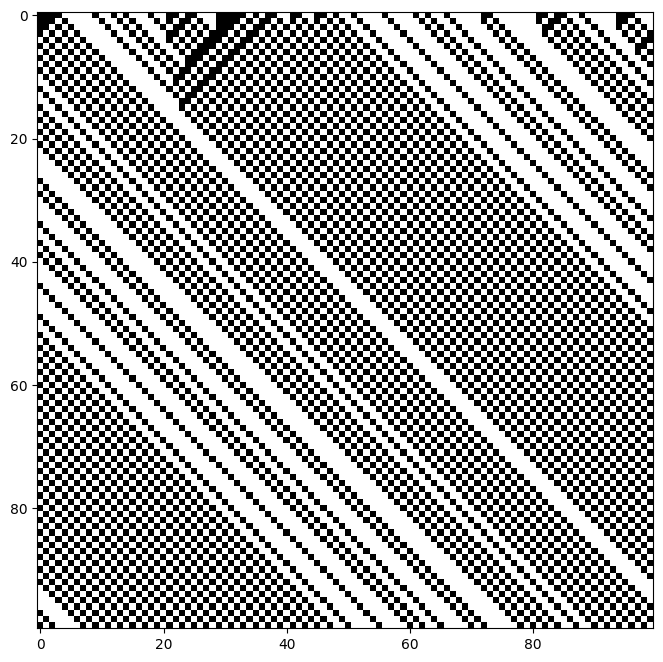

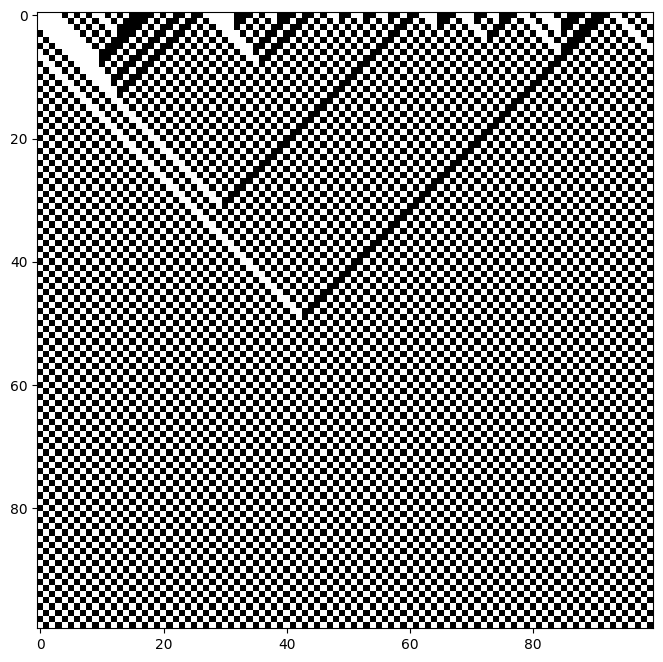

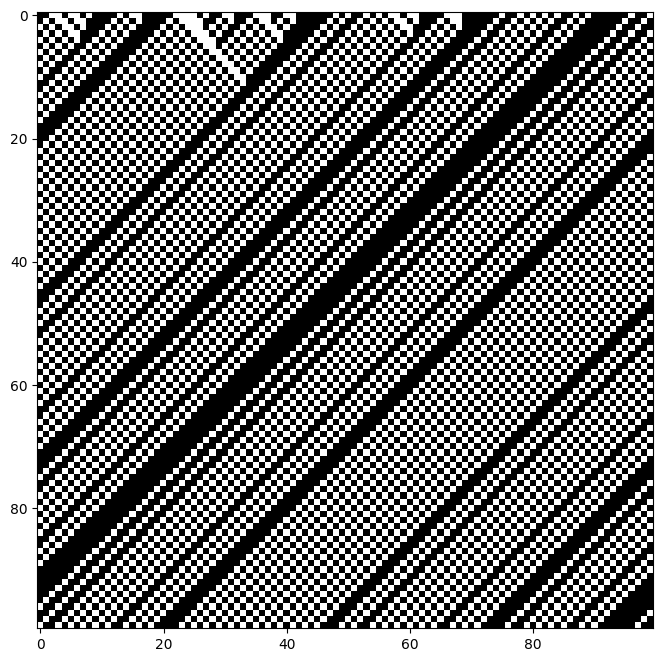

In [30]:
for grid in grids:
    fig, ax = plt.subplots(figsize=(8,8))

    ax = ax.imshow(grid, cmap="Greys")
    plt.show()

## Zadanie 2 Probabilistyczny automat komórkowy (model ruchu ulicznegoNagela-Schreckenberga) 

d_i mozemy dla latwosci przyjac wartosc 1, jako zawsze dostep jednej komórki między samochodzikami

"Półkrok" V(t+1/2) rozumiemy jako tablicę wartości, którą wyliczamy zanim podejmiemy wybór wartości we właściwym kroku V(t+1), 
nie jest to "fizyczny" krok.

Periodyczność polega na "zawijaniu" ruchu samochodów, pętli.

In [26]:
# TODO: Make it a proper class
def nagel_schreckenberg(L=100, iterations=100, probability=0.2, vmax=2, car_density=0.28):

    def _init_state():
        n = int(L * car_density)
        row = np.full(L, -1).astype(np.int8)
        row[:n] = 0
        np.random.seed(0)
        return np.random.permutation(row)

    def _apply_first_rule(state):
        new_state = np.full(L, -1).astype(np.int8)
        
        # Find the last car
        last_car = L - 1
        while last_car >= 0 and state[last_car] == -1:
            last_car -= 1
            
        # Process all the car except for the last one
        i = last_car - 1
        dist = 1
        while i >= 0:
            if state[i] == -1: # not a car
                dist += 1
            else: # car
                new_state[i] = min(state[i] + 1, dist - 1, vmax)
                dist = 1
            i -= 1
                # Process the last car
        dist += L - last_car - 1
        new_state[last_car] = min(state[last_car] + 1, dist - 1, vmax)
        
        return new_state

    def _apply_second_rule(state):
        new_state = np.full(L, -1).astype(np.int8)
        for i in range(L):
            if state[i] != -1:
                if np.random.uniform() < probability:
                    new_state[i] = max(state[i] - 1, 0)
                else:
                    new_state[i] = state[i]
        
        return new_state

    def _apply_move(state):
        new_state = np.full(L, -1).astype(np.int8)
        for i in range(L):
            if state[i] != -1:
                new_pos = (i + state[i]) % L
                new_state[new_pos] = state[i]
        return new_state

    def _apply_turn(state):
        state = _apply_first_rule(state)
        state = _apply_second_rule(state)
        return _apply_move(state)

    
    states = np.empty((iterations, L), dtype=np.int8)
    states = states.astype(np.int8)
    m, n = states.shape
    
    # initial state:
    states[0] = _init_state()
    
    # fill states:
    for s in range(1, iterations):
        states[s] = _apply_turn(states[s-1])

    return states
    
    


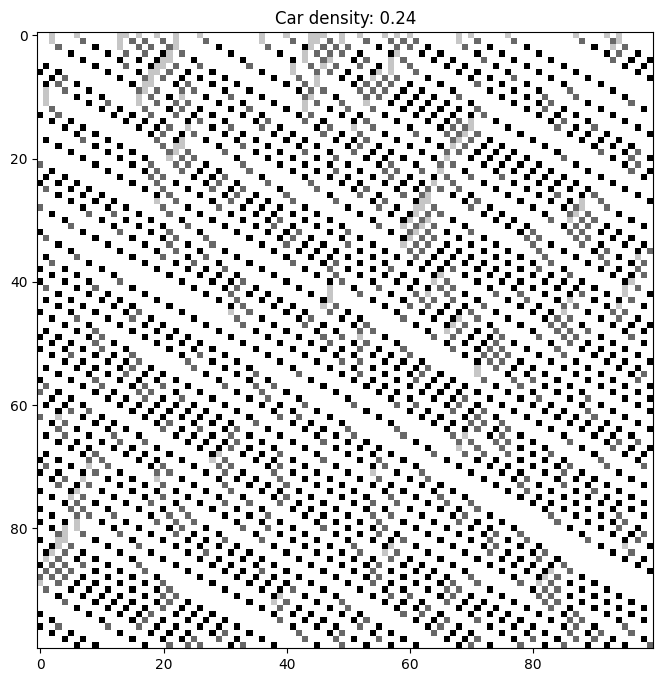

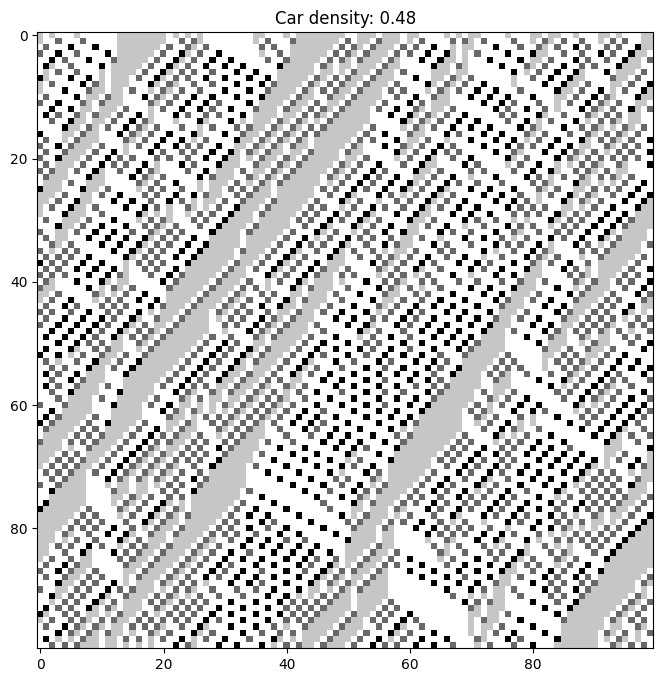

In [31]:
for density in [0.24, 0.48]:
    states = nagel_schreckenberg(car_density=density)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(states, cmap='Greys')
    
    plt.title(f'Car density: {density}')
    plt.show()